# __Spherical harmonic transform__

---



This tutorial demonstrates how to use `S2FFT` to compute spherical harmonic transforms.

Specifically, we will adopt the sampling scheme of [McEwen & Wiaux (2012)](https://arxiv.org/abs/1110.6298). 

First let's load an input signal that is sampled on the sphere with this sampling scheme.  We'll consider the Galactic plane map captured by ESA's [Gaia satellite](https://sci.esa.int/web/gaia)!

In [1]:
import jax
jax.config.update("jax_enable_x64", True)

import numpy as np
import s2fft 
import plotting_functions

L = 1000
sampling = "mw"
f = np.load('data/Gaia_EDR3_flux.npy')

Now, lets take a look at the data on the sphere using [PyVista](https://docs.pyvista.org/index.html). 

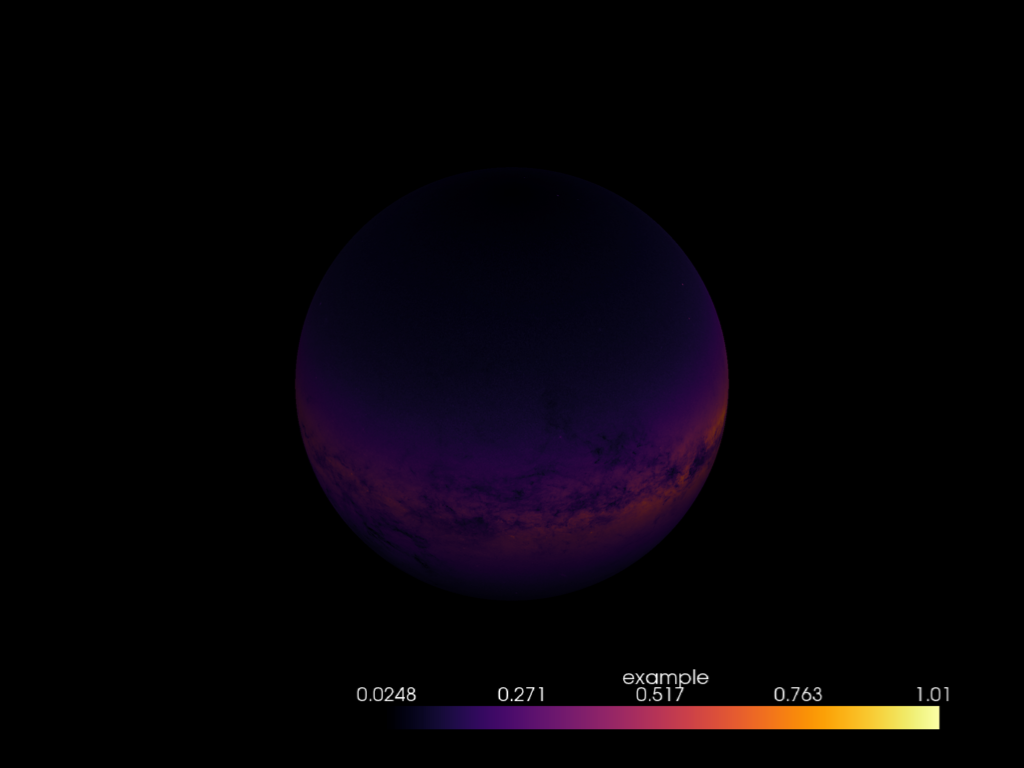

In [2]:
plotting_functions.plot_sphere(f, L, sampling, isnotebook=True)

### Computing the forward spherical harmonic transform

---

Let's now run the JAX function to compute the spherical harmonic transform of this observational map.

In [3]:
flm = s2fft.forward_jax(f, L, reality=True)

If you are planning on applying this transform many times (e.g. during training of a model) we recommend precomputing and storing some small arrays that are used every time. To do this simply compute these and pass as a static argument.

In [4]:
precomps = s2fft.generate_precomputes_jax(L, forward=True)
flm_pre = s2fft.forward_jax(f, L, reality=True, precomps=precomps)

### Computing the inverse spherical harmonic transform

---

Let's run the JAX function to cmpute the inverse spherical harmonic transform to get back to the observational map.

In [5]:
f_recov = s2fft.inverse_jax(flm, L, reality=True)

Again, if you are planning on applying this transform many times we recommend precomputing and storing some small arrays that are used every time. To do this simply compute these and pass as a static argument.

In [6]:
precomps = s2fft.generate_precomputes_jax(L, forward=False)
f_recov_pre = s2fft.inverse_jax(flm_pre, L, reality=True, precomps=precomps)

### Computing the error

---

Let's check the associated error, which should be close to machine precision for the sampling scheme used.

In [7]:
print(f"Mean absolute error = {np.nanmean(np.abs(np.real(f_recov) - f))}")

Mean absolute error = 4.208704050218645e-13


In [8]:
print(f"Mean absolute error using precomputes = {np.nanmean(np.abs(np.real(f_recov_pre) - f))}")

Mean absolute error using precomputes = 4.208704050218645e-13
